In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('/content/expresso_processed.csv')
data.head()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


In [3]:
unique_values = {}
for i in data.columns:
    if data[i].dtype =='O':
        unique_values[i] = data[i].unique()

print(unique_values)
print('\n')
print(len(data))

{'TENURE': array(['K > 24 month', 'I 18-21 month', 'G 12-15 month', 'H 15-18 month',
       'J 21-24 month', 'F 9-12 month', 'E 6-9 month', 'D 3-6 month'],
      dtype=object), 'MRG': array(['NO'], dtype=object)}


64376


In [4]:
data.info()
print('\n')
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      64376 non-null  int64  
 1   TENURE          64376 non-null  object 
 2   MONTANT         64376 non-null  float64
 3   FREQUENCE_RECH  64376 non-null  float64
 4   REVENUE         64376 non-null  float64
 5   ARPU_SEGMENT    64376 non-null  float64
 6   FREQUENCE       64376 non-null  float64
 7   DATA_VOLUME     64376 non-null  float64
 8   ON_NET          64376 non-null  float64
 9   MRG             64376 non-null  object 
 10  REGULARITY      64376 non-null  int64  
 11  CHURN           64376 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 5.9+ MB




,Unnamed: 0,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
count,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.00000,64376.000000,64376.000000
mean,16216.330620,5061.212812,10.630126,5173.670560,1724.561591,13.252718,3252.074189,218.65919,33.197496,0.456319
std,9501.522628,6777.622016,12.490926,6913.023944,2304.338459,13.988994,7841.567790,754.75000,20.432429,0.498092
min,0.000000,50.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
25%,8046.750000,1000.000000,2.000000,1001.000000,334.000000,3.000000,1.000000,3.00000,14.000000,0.000000
50%,16093.500000,2900.000000,6.000000,2951.000000,984.000000,8.000000,507.000000,15.00000,32.000000,0.000000
75%,24140.250000,6500.000000,14.000000,6699.000000,2233.000000,18.000000,3156.000000,97.00000,54.000000,1.000000
max,34999.000000,286500.000000,133.000000,323541.000000,107847.000000,91.000000,283493.000000,25263.00000,62.000000,1.000000


In [5]:
data.isnull().sum()

Unnamed: 0        0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
MRG               0
REGULARITY        0
CHURN             0
dtype: int64

In [6]:
data[data.duplicated()]

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()
data1= data.drop('Unnamed: 0', axis=1,)
data1.drop('CHURN', axis = 1)
for column in data1.columns:
    if data1[column].dtype =='O':
        data1[column]= encoder.fit_transform(data1[column])
    else:
        data1[column] =scaler.fit_transform(data1[[column]])
data1['CHURN'] = data['CHURN']
data1.head()


,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,7,-0.304123,-0.530800,-0.314144,-0.314002,-0.375492,-0.380804,-0.288388,0,-0.058608,1
1,7,-0.525441,-0.610858,-0.461982,-0.461985,-0.589948,0.138867,-0.288388,0,-0.205435,1
2,7,0.706564,1.710845,0.645935,0.645934,1.769067,-0.070404,-0.284413,0,0.773409,1
3,5,-0.599214,-0.690917,-0.603890,-0.603892,-0.804404,-0.317423,-0.279113,0,-1.575816,1
4,7,-0.569705,-0.610858,-0.577707,-0.577854,-0.732919,-0.037885,-0.252614,0,-0.596972,1


<Axes: xlabel='CHURN', ylabel='count'>

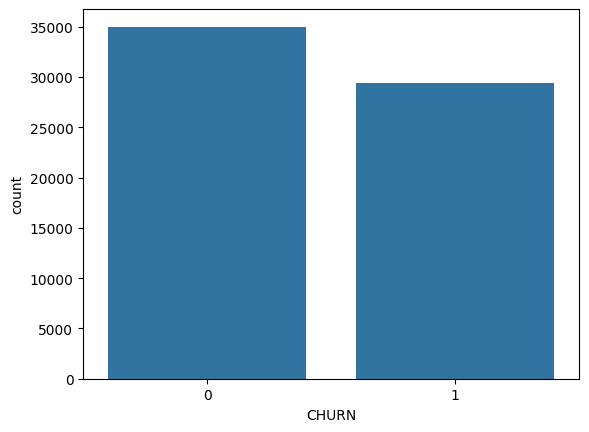

In [9]:
sns.countplot(x= data1['CHURN'])

In [15]:
x = data1.drop('CHURN', axis =1)
y = data1['CHURN']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size = 0.8, random_state= 15)
print(f"'xtrain':{xtrain.shape}")
print(f"'ytrain':{ytrain.shape}")
print(f"'xtest': {xtest.shape}")
print(f"'xtest': {xtest.shape}")

'xtrain':(51500, 10)
'ytrain':(51500,)
'xtest': (12876, 10)
'xtest': (12876, 10)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

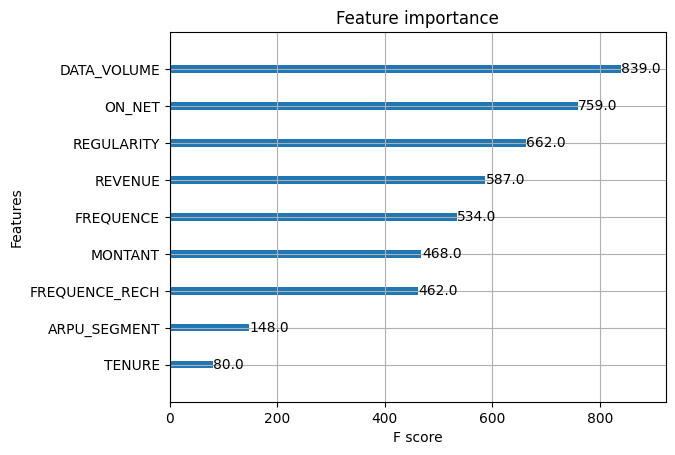

In [17]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x,y)
xgb.plot_importance(model,importance_type = 'weight')

In [18]:
logreg.fit(xtrain,ytrain)
cross_val = logreg.predict(xtrain)
print(classification_report(cross_val, ytrain))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     27696
           1       0.75      0.74      0.75     23804

    accuracy                           0.77     51500
   macro avg       0.77      0.77      0.77     51500
weighted avg       0.77      0.77      0.77     51500



In [19]:
y_predict = logreg.predict(xtest)
print(classification_report(y_predict, ytest))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      6864
           1       0.76      0.75      0.75      6012

    accuracy                           0.77     12876
   macro avg       0.77      0.77      0.77     12876
weighted avg       0.77      0.77      0.77     12876



In [23]:
import joblib
joblib.dump(logreg,open('ChunPrediction.pkl', 'wb'))